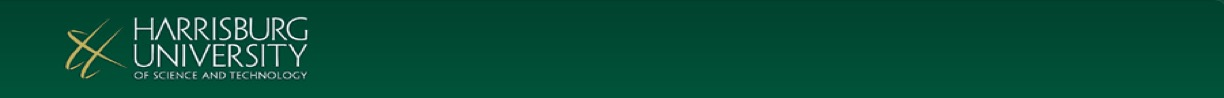

<p><H1><center>CISC 680 SU 2019</center></H1>
<H2><center>Applied Artificial Intelligence Summer Camp</center></H2>
<H3><center>Lab Booklet #10</center>
<br><center>Lab Title: Decision Trees</center></H3>
<H4><center>Instructors:  Prof. Shalaan PhD, Prof. Grey M.S., Prof. Chu M.S.</center>
<br><center>TA's:  Aditya Syal, Bao Pham, Zach Pelkey</H4></center></p>

# Objectives
- Become familiar with an implementation of a Decision Tree
- Learn how to export a visualization of a Decision Tree classifier to a PDF.
- Learn how to apply some of the Sklearn methods to produce a trained classifier.
- Become familiar with analyzing performance metrics.
- Utilize grid search to find an optimal maximum depth for a Decision Tree classifier.

# Resources
- https://scikit-learn.org/stable/modules/tree.html#classification
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Deliverables
#### Be sure to hand the following deliverables in to the Moodle Page:
<b><i>
- This Jupyter Notebook with questions answered and associated programs written where asked.
- PDF(s) of associated tree visualizations that you created.
</i></b>

# Instructions & Questions

<H3>Background Information:</H3>

We have extracted a data set in which we have various census information on adults in 1994. This dataset should look very familiar to you as you used the same exact one in your previous lab. Everyone has recieved their own copy of <b>textX.txt</b> that contains a 8000 record sample of the data with the following attributes and their data type/values respectively.

<br>1. age: continuous. 
<br>2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
<br>3. final weights: continuous. 
<br>4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
<br>5. education-num: continuous. 
<br>6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
<br>7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
<br>8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
<br>9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
<br>10. sex: Female, Male. 
<br>11. capital-gain: continuous. 
<br>12. capital-loss: continuous. 
<br>13. hours-per-week: continuous. 
<br>14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

<H4>Use your already cleaned dataset you used in LAB 09 to code and answer the following questions:</H4>

1. We have already cleaned this data from the previous lab on Naive Bayes Classifiers. Train a Decision Tree Classifier on the data. This tree classifier should have <b>no max depth</b> on this attempt. Be sure to run some form of cross-validation during training. Provide accuracy results and explain how you think it performed.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
decision=tree.DecisionTreeClassifier()
df = pd.read_csv('text6.csv', header=None)

In [2]:
df=df.drop(df[df[1]==' ?'].index)
df=df.drop(df[df[6]==' ?'].index)
df=df.drop(df[df[15]==' ?'].index)
df=df.drop(df[df[3]==' ?'].index)
df=df.drop(df[df[5]==' ?'].index)
df=df.drop(df[df[7]==' ?'].index)
df=df.drop(df[df[8]==' ?'].index)
df=df.drop(df[df[9]==' ?'].index)
df=df.drop(df[df[16]==' ?'].index)
df=df.drop(df[df[13]==' ?'].index)
df=df.drop(df[df[14]==' ?'].index)
to_drop = [0,8,9,13,7,2,4,10,11]
df.drop(to_drop, inplace=True, axis=1, errors='ignore')
df

KeyError: 15

In [ ]:
set(df[15])
set(df[16])
set(df[1])
set(df[3])
set(df[5])
set(df[6])
#set(df[7])
#set(df[8])
#set(df[9])
#set(df[13])
set(df[14])
encoder = preprocessing.LabelEncoder()
df[1] = encoder.fit_transform(df[1])
df[3] = encoder.fit_transform(df[3])
df[5] = encoder.fit_transform(df[5])
df[6] = encoder.fit_transform(df[6])
#df[7] = encoder.fit_transform(df[7])
df[14] = encoder.fit_transform(df[14])
df[15] = encoder.fit_transform(df[15])
df[16] = encoder.fit_transform(df[16])
df



In [ ]:
y=df[14]
df=df.drop(df[14])
y=y[:-2]
#y

In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

In [ ]:

#model=GaussianNB()
x_train,x_test,y_train,y_test=train_test_split(df , y, test_size=0.7, random_state=3)
decision.fit(x_train,y_train)
y_pred=decision.predict(x_test)


2. Follow the <a href="https://scikit-learn.org/stable/modules/tree.html#classification">link at the top of the document</a> to SciKit-Learn.org’s page on tree classification. Use the resources there to install (if necessary) and run the graphviz library to visualize your trained decision tree. <b>Include a PDF or other file of this tree.</b> Provide any thoughts or commentary about this tree you deem necessary.

In [ ]:
#Write the code to export your tree to a PDF. Be sure to hand it in with this lab booklet.import graphviz
dot_data=tree.export_graphviz(decision,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("Graph")


3. Use a Grid Search to determine the optimal maximum depth for our tree. Provide <b>evidence</b> of why this is the maximum depth.

In [ ]:

criterion=['entropy','gini']
max_depth=[1,3,5,7,8,9,10,11,12,13,None]
splitter=['best','random']
grid=GridSearchCV(estimator=decision,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)#Write the code to determine the optimcal maximum depth.

4. Train a Decision Tress Classifier with the optimal maximum depth as determined from question 3. Provide the relevant descriptive statistics for this tree and <b>show its associated visualization using graphviz</b>.

In [3]:
x_train,x_test,y_train,y_test=train_test_split(df , y, test_size=0.3)
model1=model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Presicion=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))
print("F1 score=",metrics.f1_score(y_test,y_pred))

import graphviz
dot_data=tree.export_graphviz(model1,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("GraphMaxDepth")

NameError: name 'y' is not defined